# Project 4 - Clustering
---

# Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Import Data

In [2]:
GTDB_USA_all = pd.read_csv("GTDB_USA.csv")

In [3]:
GTDB_USA_all.head()

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,197001010002,1970,1,1,NaN,0,NaN,217,United States,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
1,1,197001020002,1970,1,2,NaN,0,NaN,217,United States,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
2,2,197001020003,1970,1,2,NaN,0,NaN,217,United States,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
3,3,197001030001,1970,1,3,NaN,0,NaN,217,United States,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN
4,4,197001050001,1970,1,1,NaN,0,NaN,217,United States,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


# Select Variables of Interest

In [4]:
GTDB_USA = GTDB_USA_all[['iyear', 'imonth', 'iday', 'provstate','city', 'crit1', 'crit2', 'crit3', 'suicide',
                    'attacktype1', 'attacktype1_txt', 'targtype1', 'targsubtype1', 'targtype1_txt', 'gname', 'nkill', 'nwound', 
                    'weaptype1', 'weaptype1_txt', 'success']]
GTDB_USA.head()

,iyear,imonth,iday,provstate,city,crit1,crit2,crit3,suicide,attacktype1,attacktype1_txt,targtype1,targsubtype1,targtype1_txt,gname,nkill,nwound,weaptype1,weaptype1_txt,success
0,1970,1,1,Illinois,Cairo,1,1,1,0,2,Armed Assault,3,22.0,Police,Black Nationalists,0.0,0.0,5,Firearms,1
1,1970,1,2,California,Oakland,1,1,1,0,3,Bombing/Explosion,21,107.0,Utilities,Unknown,0.0,0.0,6,Explosives,1
2,1970,1,2,Wisconsin,Madison,1,1,1,0,7,Facility/Infrastructure Attack,4,28.0,Military,New Year's Gang,0.0,0.0,8,Incendiary,1
3,1970,1,3,Wisconsin,Madison,1,1,1,0,7,Facility/Infrastructure Attack,2,21.0,Government (General),New Year's Gang,0.0,0.0,8,Incendiary,1
4,1970,1,1,Wisconsin,Baraboo,1,1,0,0,3,Bombing/Explosion,4,27.0,Military,"Weather Underground, Weathermen",0.0,0.0,6,Explosives,0


In [5]:
# Rename columns 
GTDB_USA.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day', 'provstate':'State','attacktype1':'Attack_Type', 'attacktype1_txt': 'Attack',
                        'targtype1_txt':'Target','nkill':'Killed', 'nwound':'Wounded','gname':'Group','targtype1':'Target_type',
                        'weaptype1':'Weapon_type', 'weaptype1_txt':'Weapon'},inplace=True)
GTDB_USA.head()

/var/folders/24/536gs7r91qzd964t2ppqhs6m0000gn/T/ipykernel_13530/1627560304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GTDB_USA.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day', 'provstate':'State','attacktype1':'Attack_Type', 'attacktype1_txt': 'Attack',


,Year,Month,Day,State,city,crit1,crit2,crit3,suicide,Attack_Type,Attack,Target_type,targsubtype1,Target,Group,Killed,Wounded,Weapon_type,Weapon,success
0,1970,1,1,Illinois,Cairo,1,1,1,0,2,Armed Assault,3,22.0,Police,Black Nationalists,0.0,0.0,5,Firearms,1
1,1970,1,2,California,Oakland,1,1,1,0,3,Bombing/Explosion,21,107.0,Utilities,Unknown,0.0,0.0,6,Explosives,1
2,1970,1,2,Wisconsin,Madison,1,1,1,0,7,Facility/Infrastructure Attack,4,28.0,Military,New Year's Gang,0.0,0.0,8,Incendiary,1
3,1970,1,3,Wisconsin,Madison,1,1,1,0,7,Facility/Infrastructure Attack,2,21.0,Government (General),New Year's Gang,0.0,0.0,8,Incendiary,1
4,1970,1,1,Wisconsin,Baraboo,1,1,0,0,3,Bombing/Explosion,4,27.0,Military,"Weather Underground, Weathermen",0.0,0.0,6,Explosives,0


In [6]:
GTDB_USA.shape

(3121, 20)

# Data Cleaning

Drop Puerto Rico and US Virgin Islands

In [7]:
GTDB_USA = GTDB_USA[GTDB_USA.State.isin(['Puerto Rico', 'U.S. Virgin Islands', 'Unknown']) == False]

In [8]:
GTDB_USA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2869 entries, 0 to 3120
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          2869 non-null   int64  
 1   Month         2869 non-null   int64  
 2   Day           2869 non-null   int64  
 3   State         2869 non-null   object 
 4   city          2869 non-null   object 
 5   crit1         2869 non-null   int64  
 6   crit2         2869 non-null   int64  
 7   crit3         2869 non-null   int64  
 8   suicide       2869 non-null   int64  
 9   Attack_Type   2869 non-null   int64  
 10  Attack        2869 non-null   object 
 11  Target_type   2869 non-null   int64  
 12  targsubtype1  2751 non-null   float64
 13  Target        2869 non-null   object 
 14  Group         2869 non-null   object 
 15  Killed        2819 non-null   float64
 16  Wounded       2801 non-null   float64
 17  Weapon_type   2869 non-null   int64  
 18  Weapon        2869 non-null 

In [9]:
GTDB_USA.isna().sum()

Year              0
Month             0
Day               0
State             0
city              0
crit1             0
crit2             0
crit3             0
suicide           0
Attack_Type       0
Attack            0
Target_type       0
targsubtype1    118
Target            0
Group             0
Killed           50
Wounded          68
Weapon_type       0
Weapon            0
success           0
dtype: int64

We will drop all rows with N/A values.

In [10]:
GTDB_USA = GTDB_USA.dropna()

In [11]:
GTDB_USA.shape

(2683, 20)

# Exploratory Data Analysis

In [12]:
GTDB_USA.describe()

,Year,Month,Day,crit1,crit2,crit3,suicide,Attack_Type,Target_type,targsubtype1,Killed,Wounded,Weapon_type,success
count,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000
mean,1988.062244,6.262766,15.305255,0.981737,0.983228,0.992546,0.007082,4.400671,6.766306,40.430116,1.449124,9.773761,6.658964,0.828550
std,17.415874,3.347272,9.168060,0.133926,0.128441,0.086032,0.083870,2.210432,5.754176,29.868452,38.167953,298.031224,1.591475,0.376972
min,1970.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1972.000000,3.000000,7.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,14.000000,0.000000,0.000000,6.000000,1.000000
50%,1982.000000,6.000000,15.000000,1.000000,1.000000,1.000000,0.000000,3.000000,5.000000,40.000000,0.000000,0.000000,6.000000,1.000000
75%,2001.000000,9.000000,23.000000,1.000000,1.000000,1.000000,0.000000,7.000000,14.000000,68.000000,0.000000,0.000000,8.000000,1.000000
max,2020.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,110.000000,1385.000000,10878.000000,13.000000,1.000000


<AxesSubplot:>

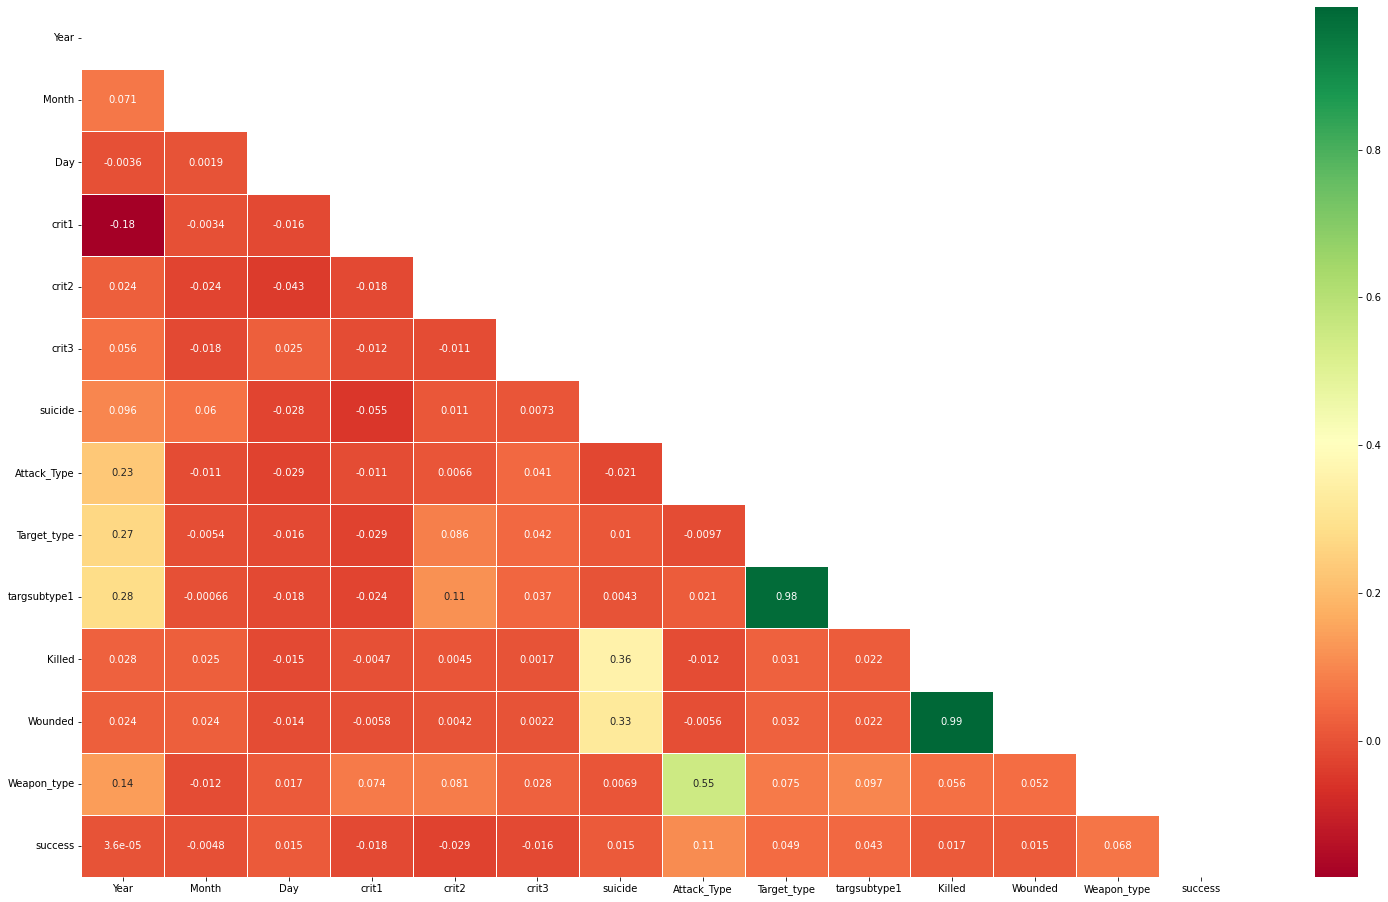

In [13]:
mask = np.zeros_like(GTDB_USA.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (26,16))
sns.heatmap(GTDB_USA.corr(), mask=mask, annot=True, cmap="RdYlGn", linewidths=.75)

# Pre-Processing

In [14]:
# get the numerical features (all of our features here are numerical, so we don't *really* need this)
# also note, if you have features that aren't numerical but you still want to use them, you can convert them to numbers
numerical_feats = list(GTDB_USA._get_numeric_data().columns)
dim_df = GTDB_USA[numerical_feats]

In [15]:
# standardize values
x = dim_df.values
x = StandardScaler().fit_transform(x)

# PCA

In [16]:
# apply PCA
pca = PCA(n_components = 2, random_state = 7) # reduce to 2 dimensions
pca_mdl = pca.fit_transform(x)

In [17]:
pca_mdl

array([[-1.22610476,  0.90804185],
       [ 1.57775309, -1.80985251],
       [-0.40699306,  0.24256593],
       ...,
       [ 2.18385255, -1.95979488],
       [ 3.09225686,  3.58777345],
       [ 2.1436298 , -1.96309839]])

In [18]:
pca_mdl.shape

(2683, 2)

# Visualize

In [19]:
# convert PCA array output to dataframe
pca_df = pd.DataFrame(pca_mdl)
pca_df.head()

,0,1
0,-1.226105,0.908042
1,1.577753,-1.809853
2,-0.406993,0.242566
3,-0.666031,0.493976
4,-1.626891,1.251341


When plotting this along with the target values, it is useful to see that they appear to be separable and in individual clusters.

<AxesSubplot:xlabel='0', ylabel='1'>

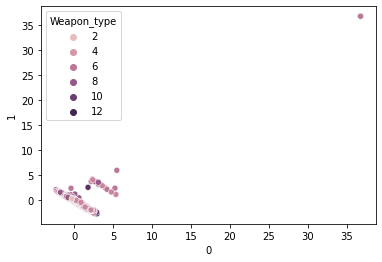

In [20]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=GTDB_USA.Weapon_type)